In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
combine=[data,test_data]

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#data.dtypes

In [5]:
#data.isnull().sum()

In [6]:
#data.info()


In [7]:
def delete_null_value_above_sixty_percent():
    rows,columns=data.shape
    for dataset in combine:
        for feature in dataset:
            if dataset[feature].isnull().sum()>(0.6*rows):
                del dataset[feature]
                print(feature)
    return combine

In [8]:
combine=delete_null_value_above_sixty_percent()

Alley
PoolQC
Fence
MiscFeature
Alley
PoolQC
Fence
MiscFeature


In [9]:
 for feature in data:
        if data[feature].isnull().sum()>0:
            print(feature)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


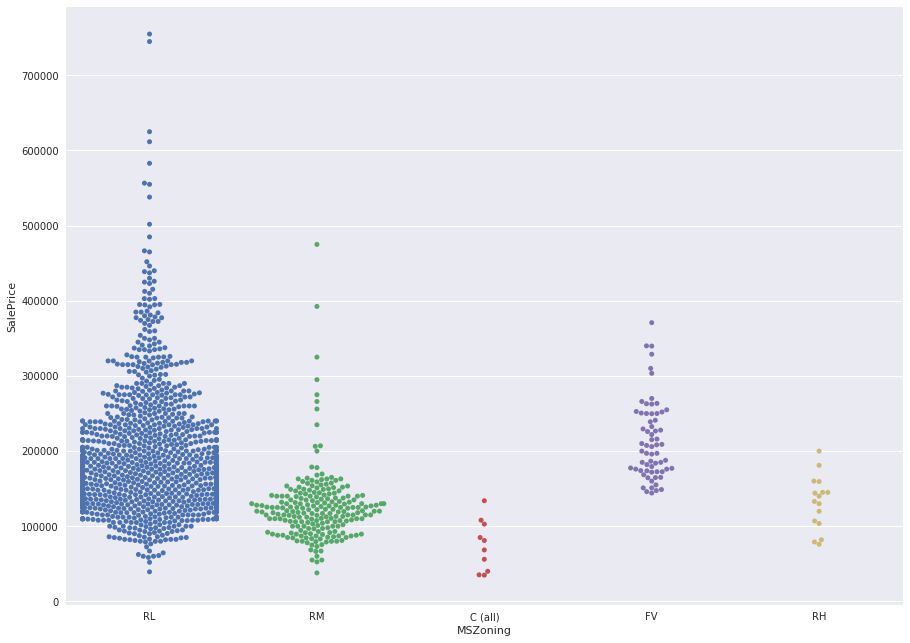

In [10]:
a4_dims=(15,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x='MSZoning',y='SalePrice',data=data)

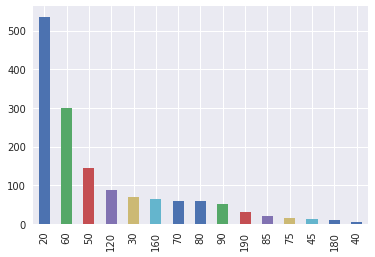

In [11]:
data['MSSubClass'].value_counts().plot.bar()

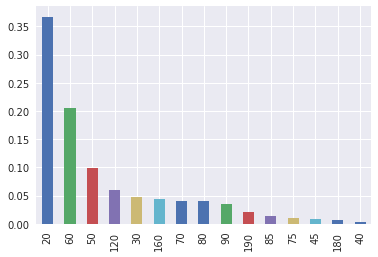

In [12]:
(data['MSSubClass'].value_counts()/len(data)).plot.bar()

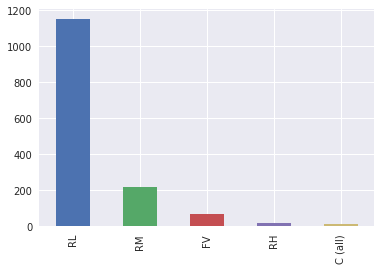

In [13]:
data['MSZoning'].value_counts().plot.bar()

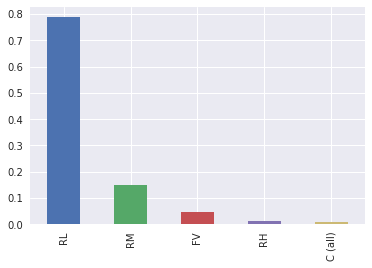

In [14]:
(data['MSZoning'].value_counts()/len(data)).plot.bar()

/home/posi2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/posi2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


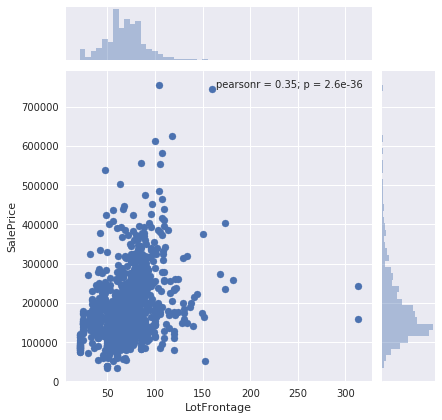

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.jointplot(x="LotFrontage", y="SalePrice", data=data)

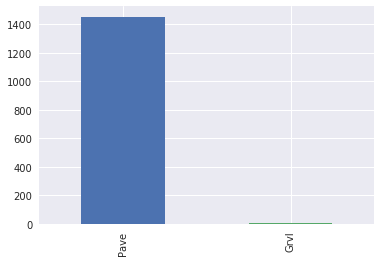

In [16]:
data['Street'].value_counts().plot.bar()

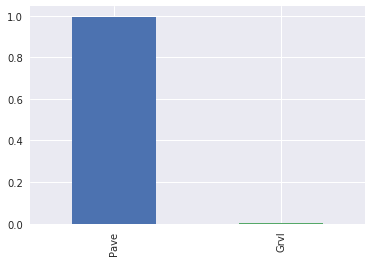

In [17]:
(data['Street'].value_counts()/len(data)).plot.bar()

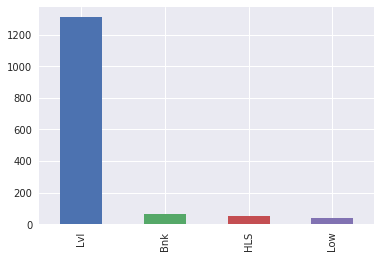

In [18]:
data['LandContour'].value_counts().plot.bar()

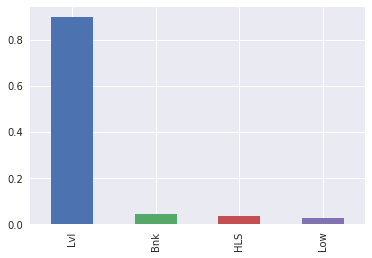

In [19]:
(data['LandContour'].value_counts()/len(data)).plot.bar()

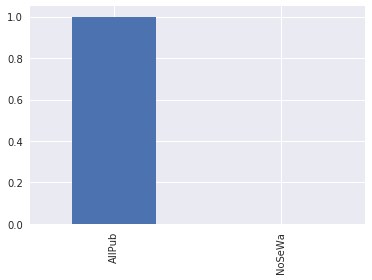

In [20]:
(data['Utilities'].value_counts()/len(data)).plot.bar()

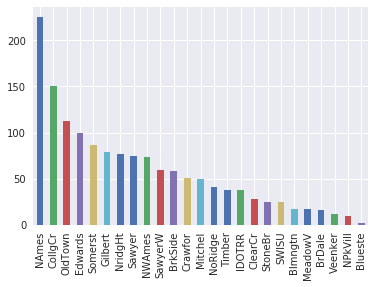

In [21]:
data['Neighborhood'].value_counts().plot.bar()

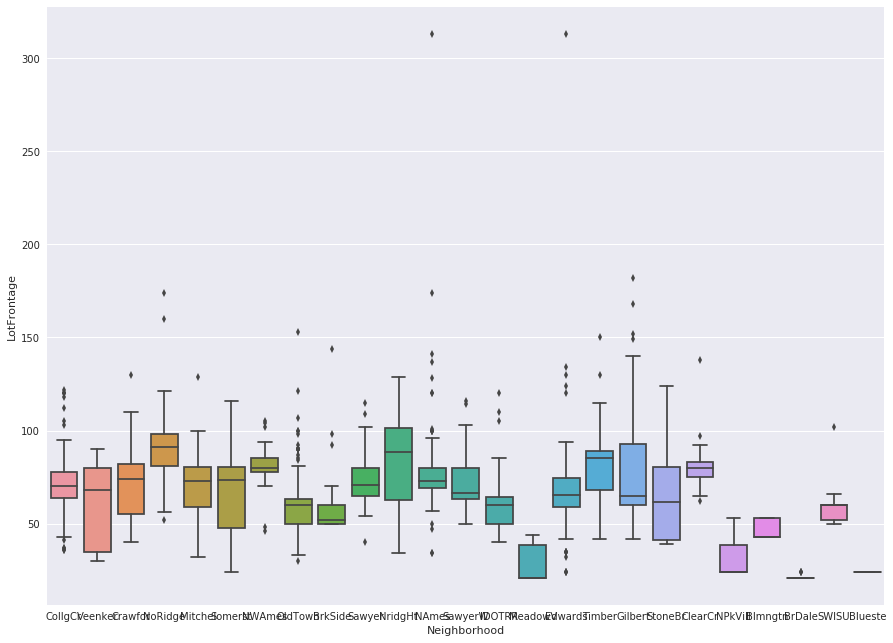

In [22]:
a4_dims=(15,11)
fig,ax=plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x='Neighborhood',y='LotFrontage',data=data)

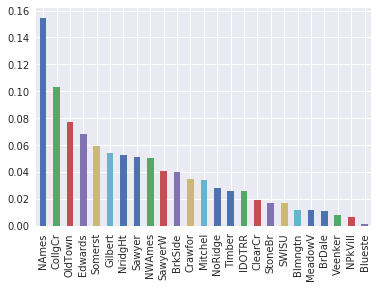

In [23]:
(data['Neighborhood'].value_counts()/len(data)).plot.bar()

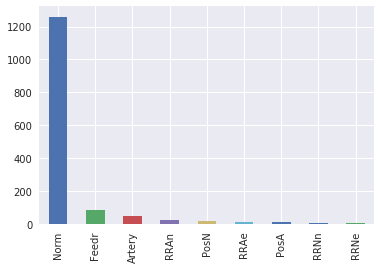

In [24]:
data['Condition1'].value_counts().plot.bar()

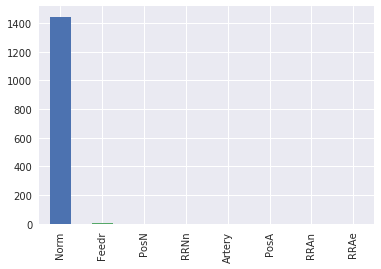

In [25]:
data['Condition2'].value_counts().plot.bar()

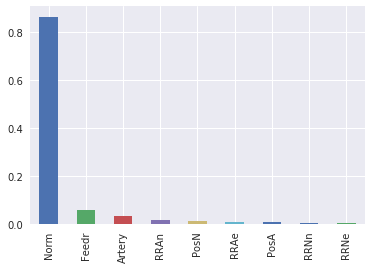

In [26]:
(data['Condition1'].value_counts()/len(data)).plot.bar()

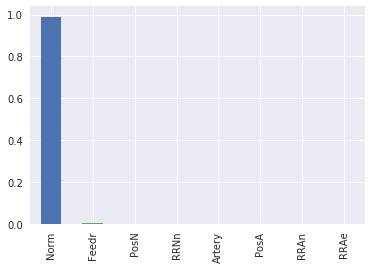

In [27]:
(data['Condition2'].value_counts()/len(data)).plot.bar()

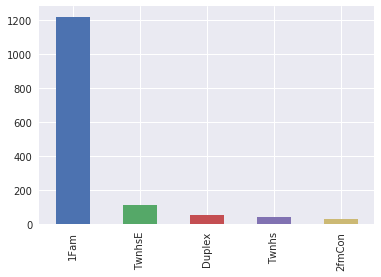

In [28]:
data['BldgType'].value_counts().plot.bar()

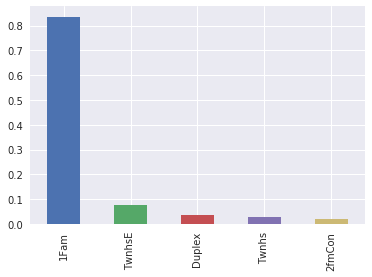

In [29]:
(data['BldgType'].value_counts()/len(data)).plot.bar()

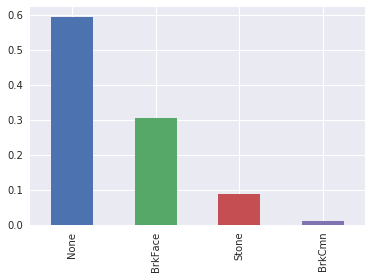

In [30]:
(data['MasVnrType'].value_counts()/len(data)).plot.bar()

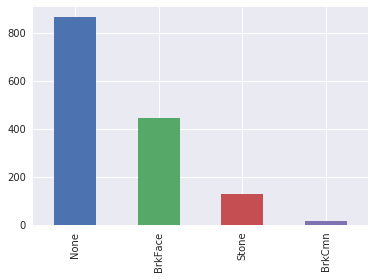

In [31]:
data['MasVnrType'].value_counts().plot.bar()

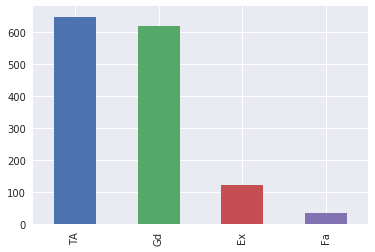

In [32]:
data['BsmtQual'].value_counts().plot.bar()

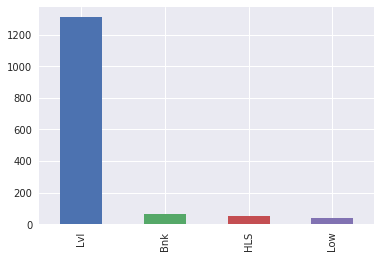

In [33]:
data['LandContour'].value_counts().plot.bar()

In [40]:

for dataset in combine:
    for feature in dataset:
        if dataset[feature].dtypes=='object' and dataset[feature].isnull().sum()>0:
            dataset[feature].fillna(data[feature].mode())
        else:
            if  dataset[feature].isnull().sum()>0:
                med=dataset[feature].median()
                dataset[feature].fillna(dataset[feature].median(),inplace=True)
        print(dataset.head(10))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL          NaN    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside    ...          

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL         69.0    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside    ...          

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL         69.0    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside    ...          

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
5   6          50       RL         85.0    14115   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   
7   8          60       RL         69.0    10382   Pave      IR1         Lvl   
8   9          50       RM         51.0     6120   Pave      Reg         Lvl   
9  10         190       RL         50.0     7420   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside    ...          

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   
5  1466          60       RL         75.0    10000   Pave      IR1   
6  1467          20       RL         67.0     7980   Pave      IR1   
7  1468          60       RL         63.0     8402   Pave      IR1   
8  1469          20       RL         85.0    10176   Pave      Reg   
9  1470          20       RL         70.0     8400   Pave      Reg   

  LandContour Utilities LotConfig      ...       OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside      ...                 0             0   
1         Lvl    AllPub    Corner      ...                36             

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   
5  1466          60       RL         75.0    10000   Pave      IR1   
6  1467          20       RL         67.0     7980   Pave      IR1   
7  1468          60       RL         63.0     8402   Pave      IR1   
8  1469          20       RL         85.0    10176   Pave      Reg   
9  1470          20       RL         70.0     8400   Pave      Reg   

  LandContour Utilities LotConfig      ...       OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside      ...                 0             0   
1         Lvl    AllPub    Corner      ...                36             

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   
5  1466          60       RL         75.0    10000   Pave      IR1   
6  1467          20       RL         67.0     7980   Pave      IR1   
7  1468          60       RL         63.0     8402   Pave      IR1   
8  1469          20       RL         85.0    10176   Pave      Reg   
9  1470          20       RL         70.0     8400   Pave      Reg   

  LandContour Utilities LotConfig      ...       OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside      ...                 0             0   
1         Lvl    AllPub    Corner      ...                36             

In [35]:
def categorical_to_numerical_nan_value():
    list_nan_object=[]
    list_object=[]
    list_other=[]
    for feature in data:
        if data[feature].dtypes=='object' and data[feature].isnull().sum()>0:
            data[feature].fillna(data[feature].mode())
            list_nan_object.append(feature)
        elif data[feature].dtypes=='object' and data[feature].isnull().sum()==0:
            list_object.append(feature)
        else:
            if  data[feature].isnull().sum()>0:
                data[feature].fillna(data[feature].median())
            list_other.append(feature)
        
    df1=pd.get_dummies(data[list_object])
    df2=pd.get_dummies(data[list_nan_object],dummy_na=True)
    df=pd.concat([df1,df2,data[list_other]],axis=1)
    return df

In [36]:
def categorical_to_numerical():
    list_object=[]
    list_other=[]
    for feature in data:
        if data[feature].dtypes=='object':
            list_object.append(feature)
        else:
            list_other.append(feature)
        
    df1=pd.get_dummies(data[list_object])
    df=pd.concat([df1,data[list_other]],axis=1)
    return df

In [37]:
df=categorical_to_numerical()
df.isnull().sum()

MSZoning_C (all)         0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Grvl              0
Street_Pave              0
LotShape_IR1             0
LotShape_IR2             0
LotShape_IR3             0
LotShape_Reg             0
LandContour_Bnk          0
LandContour_HLS          0
LandContour_Low          0
LandContour_Lvl          0
Utilities_AllPub         0
Utilities_NoSeWa         0
LotConfig_Corner         0
LotConfig_CulDSac        0
LotConfig_FR2            0
LotConfig_FR3            0
LotConfig_Inside         0
LandSlope_Gtl            0
LandSlope_Mod            0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
                        ..
MasVnrArea               8
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2

In [38]:

y=df['SalePrice']
df=df.drop('SalePrice',axis=1)
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
from sklearn import tree
clf=tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
x_predicted=clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,x_predicted)

In [ ]:
from sklearn import neighbors
KNN=neighbors.KNeighborsRegressor()
KNN.fit(X_train, y_train)
x_predicted=clf.predict(X_test)
metrics.accuracy_score(y_test,x_predicted)

In [ ]:
from sklearn import linear_model
LM=linear_model.LinearRegression()
LM=LM.fit(X_train,y_train)
x_predicted=LM.predict(X_test)
metrics.accuracy_score(y_test,x_predicted)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
new_data=data[['LotArea','MSSubClass','LotFrontage']]
x_train=new_data[new_data['LotFrontage'].notnull()].drop(columns='LotFrontage')
y_train=new_data[new_data['LotFrontage'].notnull()]['LotFrontage']
x_test=new_data[new_data['LotFrontage'].isnull()].drop(columns='LotFrontage')
y_test=new_data[new_data['LotFrontage'].isnull()]['LotFrontage']


In [ ]:
for K in range(5):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    y_pred = neigh.predict(x_test)


In [ ]:
y_pred

In [ ]:
data.LotFrontage[data.LotFrontage.isnull()]=y_pred